In [1]:
# for using google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import pickle
import numpy as np

In [3]:
# for using google drive
train = pd.read_csv('gdrive/MyDrive/Data/Train_processed.csv')
valid = pd.read_csv('gdrive/MyDrive/Data/Valid_processed.csv')
test = pd.read_csv('gdrive/MyDrive/Data/Test_processed.csv')

In [ ]:
train = pd.read_csv('Train.csv')
valid = pd.read_csv('Valid.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
def count(text):
    text = text.split()
    return len(text)


In [ ]:
train['text'].apply(lambda x: count(x))

0        151
1        326
2        184
3         69
4        178
        ... 
39995    541
39996     50
39997    168
39998    168
39999    137
Name: text, Length: 40000, dtype: int64

In [ ]:
train['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

# remove HTML tag

In [ ]:
import nltk
from bs4 import BeautifulSoup

In [ ]:
def remove_html(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    return text

In [ ]:
train['text'][39995]

'"Western Union" is something of a forgotten classic western! Perhaps the reason for this lies in the fact of its unavailability on DVD in the United States. However, all is not lost as it has now appeared on Region 2 in England. This - being a blessing in some ways - is not only incongruous but totally ironic when one considers that a movie depicting the founding and establishment of such a uniquely American organization as The Western Union Telegraph Company is without a Region 1 release. It beggars belief! It simply doesn\'t make sense!<br /><br />Produced by Fox in 1941 "Western Union" was directed by Fritz Lang. This was only the second occasion the great German director undertook to direct a western! He had done an excellent job the year before with Fox\'s "The Return Of Frank James" and would have only one more western outing in 1952 with the splendid "Rancho Notorious". Lang was no Ford or Hawks but with "Western Union" he turned in a fine solid western that holds up very well.

In [ ]:
remove_html(train['text'][39995])

'"Western Union" is something of a forgotten classic western! Perhaps the reason for this lies in the fact of its unavailability on DVD in the United States. However, all is not lost as it has now appeared on Region 2 in England. This - being a blessing in some ways - is not only incongruous but totally ironic when one considers that a movie depicting the founding and establishment of such a uniquely American organization as The Western Union Telegraph Company is without a Region 1 release. It beggars belief! It simply doesn\'t make sense!Produced by Fox in 1941 "Western Union" was directed by Fritz Lang. This was only the second occasion the great German director undertook to direct a western! He had done an excellent job the year before with Fox\'s "The Return Of Frank James" and would have only one more western outing in 1952 with the splendid "Rancho Notorious". Lang was no Ford or Hawks but with "Western Union" he turned in a fine solid western that holds up very well. Beautifully

In [ ]:
train['text'] = train['text'].apply(lambda x: remove_html(x))

In [ ]:
valid['text'] = valid['text'].apply(lambda x: remove_html(x))

In [ ]:
test['text'] = test['text'].apply(lambda x: remove_html(x))

# remove punctuation

In [ ]:
import string 

In [ ]:
def remove_punctuation(text):
    return "".join([w for w in text if w not in string.punctuation])

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
remove_punctuation('Hello! World@')

'Hello World'

In [ ]:
train['text'] = train['text'].apply(lambda x: remove_punctuation(x))

In [ ]:
valid['text'] = valid['text'].apply(lambda x: remove_punctuation(x))

In [ ]:
test['text'] = test['text'].apply(lambda x: remove_punctuation(x))

In [ ]:
# Don't Run this Cell!!
train['text'][254]

"Its really been a long time since the last time somebody created a movie such as like this on. A so called B movie. Maybe it was not a great movie, but it is fun to watch, classic Bruce Cambell, it has its Good parts, funny ones, Disgusting ones, even artistic ones. ******Spoiler Ahead*******----------------------- --------------------------------- --------------------------- -------------The part where his wife as a dummy-robot-avenger is about to die, I don't know about you, but it made me feel so weird, so sad and disgusted in a good way. I compare this scene with the scene form the Fly 2 where his dog as a monster dies. Makes you think oh my god.---------------- --------------------------------------------- ------------------------------ --------------------------********No more Spoilers********* If you are a Bruce Cambell fan, you definitely wanna have this movie in your collection. If you are generally interested in movies, you might wanna. Just think that the movies target is t

In [ ]:
train['text'][254]

'Its really been a long time since the last time somebody created a movie such as like this on A so called B movie Maybe it was not a great movie but it is fun to watch classic Bruce Cambell it has its Good parts funny ones Disgusting ones even artistic ones Spoiler Ahead   The part where his wife as a dummyrobotavenger is about to die I dont know about you but it made me feel so weird so sad and disgusted in a good way I compare this scene with the scene form the Fly 2 where his dog as a monster dies Makes you think oh my god   No more Spoilers If you are a Bruce Cambell fan you definitely wanna have this movie in your collection If you are generally interested in movies you might wanna Just think that the movies target is to make you smile gross you outDont worry not that bad though and make you have a good time with your buddies Attention I said buddies not possible future girlfriend'

In [ ]:
train['text'][254]

'its really been a long time since the last time somebody created a movie such as like this on a so called b movie maybe it was not a great movie but it is fun to watch classic bruce cambell it has its good parts funny ones disgusting ones even artistic ones spoiler ahead   the part where his wife as a dummyrobotavenger is about to die i dont know about you but it made me feel so weird so sad and disgusted in a good way i compare this scene with the scene form the fly 2 where his dog as a monster dies makes you think oh my god   no more spoilers if you are a bruce cambell fan you definitely wanna have this movie in your collection if you are generally interested in movies you might wanna just think that the movies target is to make you smile gross you outdont worry not that bad though and make you have a good time with your buddies attention i said buddies not possible future girlfriend'

In [ ]:
train['text'][254]

'really long time since last time somebody created movie like called b movie maybe great movie fun watch classic bruce cambell good parts funny ones disgusting ones even artistic ones spoiler ahead part wife dummyrobotavenger die dont know made feel weird sad disgusted good way compare scene scene form fly 2 dog monster dies makes think oh god spoilers bruce cambell fan definitely wanna movie collection generally interested movies might wanna think movies target make smile gross outdont worry bad though make good time buddies attention said buddies possible future girlfriend'

# lower case

In [ ]:
train['text'] = train['text'].apply(lambda x: x.lower())

In [ ]:
valid['text'] = valid['text'].apply(lambda x: x.lower())

In [ ]:
test['text'] = test['text'].apply(lambda x: x.lower())

# Stop Words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def remove_stop_words(text):
    stop_words = stopwords.words('english')
    return " ".join([word for word in text.lower().split() if not word in stop_words])

In [ ]:
train['text'] = train['text'].apply(lambda x: remove_stop_words(x))

In [ ]:
valid['text'] = valid['text'].apply(lambda x: remove_stop_words(x))

In [ ]:
test['text'] = test['text'].apply(lambda x: remove_stop_words(x))

# Lemmatization Words

In [4]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
lemmatizer = WordNetLemmatizer()
def remove_lemmatization(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])

In [7]:
train['text'] = train['text'].apply(lambda x: remove_lemmatization(x))

In [8]:
valid['text'] = valid['text'].apply(lambda x: remove_lemmatization(x))

In [9]:
test['text'] = test['text'].apply(lambda x: remove_lemmatization(x))

# Most used words

In [ ]:
l = []
for text in train['text']:
    l.append(text)

In [ ]:
giant_string = " ".join(l)

In [ ]:
Words = {}
for word in giant_string.split():
    Words[word] = Words.get(word, 0) + 1

In [ ]:
Words = {k: v for k, v in sorted(Words.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
len(Words)

182488

# BoW

## Processing for BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(min_df=2000)

In [ ]:
train_set = cv.fit_transform(train['text'].values.tolist()).toarray()

In [ ]:
valid_set = cv.transform(valid['text'].values.tolist()).toarray()

In [ ]:
test_set = cv.transform(test['text'].values.tolist()).toarray()

In [ ]:
len(cv.vocabulary_)

320

In [ ]:
X = np.concatenate((train_set, valid_set))

In [ ]:
y = np.concatenate((train['label'], valid['label']))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [ ]:
param_grid = {'alpha': list(np.arange(0.0001, 0.1, 0.0001))}

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
mnb = GridSearchCV(MultinomialNB(), param_grid, refit=True, verbose=5, n_jobs=3, cv=ps)

In [ ]:
mnb.fit(X, y)

Fitting 1 folds for each of 999 candidates, totalling 999 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   12.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   28.2s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:   50.7s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 999 out of 999 | elapsed:  3.0min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=3,
             param_grid={'alpha': [0.0001, 0.0002, 0.00030000000000000003,
                                   0.0004, 0.0005, 0.0006000000000000001,
                                   0.0007000000000000001, 0.0008,
                                   0.0009000000000000001, 0.001, 0.0011,
                                   0.0012000000000000001, 0.0013000000000000002,
                                   0.0014000000000000002, 0.0015, 0.0016,
                                   0.0017000000000000001, 0.0018000000000000002,
                                   0.0019000000000000002, 0.002, 0.0021, 0.0022,
                                   0.0023, 0.0024, 0.0025, 0.0026, 0.0027,
                                   0.0028, 0.0029, 0.003

In [ ]:
mnb.best_params_

{'alpha': 0.0001}

In [ ]:
predictions = mnb.predict(test_set)

In [ ]:
pred_prob = mnb.predict_proba(test_set)
preds = pred_prob[:,1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

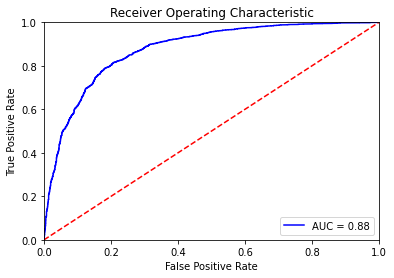

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print(confusion_matrix(test['label'], predictions))

[[1942  553]
 [ 444 2061]]


In [ ]:
print(classification_report(test['label'], predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2495
           1       0.79      0.82      0.81      2505

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

### With Kernel

#### without GridSearch

In [ ]:
# ****************

In [ ]:
model = SVC(C=1, gamma=0.01, probability=True)

In [ ]:
model.fit(train_set, train['label'])

In [ ]:
predeictios = model.predict(test_set)

In [ ]:
y_score = model.predict_proba(test_set)
# y_score = model.predict_proba(test_set)[:,1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(test['label'],predeictios))

[[2006  489]
 [ 396 2109]]


In [ ]:
print(classification_report(test['label'],predeictios))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2495
           1       0.81      0.84      0.83      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
with open("SVC_C1_gScale.pkl", 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model2 = SVC(C=1, gamma=0.01)

In [ ]:
model2.fit(train_set, train['label'])

SVC(C=1, gamma=0.01)

In [ ]:
predeictios2 = model2.predict(test_set)

In [ ]:
print(confusion_matrix(test['label'],predeictios2))

[[2006  489]
 [ 396 2109]]


In [ ]:
print(classification_report(test['label'],predeictios2))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2495
           1       0.81      0.84      0.83      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
pkl_model = "SVC_C1_g01.pkl"
with open("SVC_C1_g01.pkl", 'wb') as file:
    pickle.dump(model2, file)

In [ ]:
model3 = SVC(C=10, gamma=0.01)

In [ ]:
model3.fit(train_set, train['label'])

SVC(C=10, gamma=0.01)

In [ ]:
predctions = model3.predict(test_set)

In [ ]:
print(classification_report(test['label'], predctions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2495
           1       0.80      0.82      0.81      2505

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [ ]:
print(confusion_matrix(test['label'],predctions))

[[1983  512]
 [ 455 2050]]


In [ ]:
pkl_model = "SVC_C10_g01.pkl"
with open(pkl_model, 'wb') as file:
    pickle.dump(model3, file)


#### With GridSearch

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
ps.get_n_splits()

1

In [ ]:
svm_with_kernel = GridSearchCV(SVC(), param_grid, refit=True, verbose=5, n_jobs=3, cv=ps)

In [ ]:
%%time
svm_with_kernel.fit(X, y)

Fitting 1 folds for each of 9 candidates, totalling 9 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   6 out of   9 | elapsed: 59.5min remaining: 29.8min
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed: 115.2min finished


Wall time: 2h 12min 17s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=5)

In [ ]:
svm_with_kernel.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = svm_with_kernel.predict(test_set)

In [ ]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2495
           1       0.81      0.84      0.83      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
print(confusion_matrix(test['label'],pred))

[[2002  493]
 [ 398 2107]]


In [ ]:
model = SVC(C=1, gamma=0.01, probability=True)

In [ ]:
%%time
model.fit(train_set, train['label'])

CPU times: user 1h 6min 38s, sys: 975 ms, total: 1h 6min 39s
Wall time: 1h 6min 40s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred_prob = model.predict_proba(test_set)

In [ ]:
preds = pred_prob[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

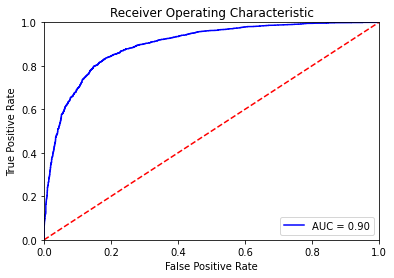

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
pred = model.predict(test_set)

In [ ]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2495
           1       0.81      0.84      0.83      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
print(confusion_matrix(test['label'],pred))

[[2012  483]
 [ 399 2106]]


Save SVM with kernel Model:

In [ ]:
with open('svm_with_kernel', 'wb') as file:
    pickle.dump(svm_with_kernel, file)

In [ ]:
with open("/content/gdrive/My Drive/svm_with_kernel_BoW_PT.pkl", 'wb') as file:
    pickle.dump(model, file)

### Without Kernel

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

#### GridSearch

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]}

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
ps.get_n_splits()

1

In [ ]:
svm_without_kernel = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=5, n_jobs=-1, cv=ps)

In [ ]:
%%time
svm_without_kernel.fit(X, y)

Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.3min finished


CPU times: user 1min 24s, sys: 164 ms, total: 1min 24s
Wall time: 5min 41s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
svm_without_kernel.best_params_

{'C': 0.1, 'max_iter': 10000}

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
svm = LinearSVC(C=0.1, max_iter=10000)

In [ ]:
 clf = CalibratedClassifierCV(svm)

In [ ]:
clf.fit(train_set, train['label'])

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=10000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [ ]:
pred_prob = clf.predict_proba(test_set)
preds = pred_prob[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

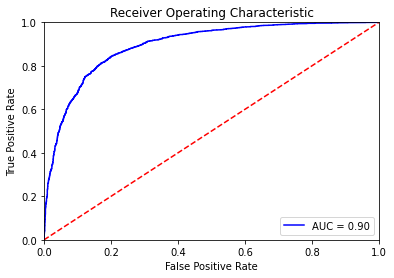

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
pred = svm_without_kernel.predict(test_set)

In [ ]:
print(confusion_matrix(test['label'],pred))

[[1981  514]
 [ 391 2114]]


In [ ]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2495
           1       0.80      0.84      0.82      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



#### without GridSearch

In [ ]:
model = LinearSVC(C=1, verbose=5, max_iter=10000)

In [ ]:
%%time
model.fit(train_set, train['label'])

[LibLinear]Wall time: 1min 40s


C:\Users\Sina\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1, max_iter=10000, verbose=5)

In [ ]:
predeictios = model.predict(test_set)

In [ ]:
print(confusion_matrix(test['label'],predeictios))

[[1973  522]
 [ 396 2109]]


In [ ]:
print(classification_report(test['label'],predeictios))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2495
           1       0.80      0.84      0.82      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
model10 = LinearSVC(C=10, verbose=5, max_iter=10000)

In [ ]:
%%time
model10.fit(train_set, train['label'])

[LibLinear]Wall time: 1min 51s


C:\Users\Sina\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10, max_iter=10000, verbose=5)

In [ ]:
predeictios10 = model10.predict(test_set)

In [ ]:
print(confusion_matrix(test['label'],predeictios10))

[[1974  521]
 [ 399 2106]]


In [ ]:
print(classification_report(test['label'],predeictios10))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2495
           1       0.80      0.84      0.82      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



# TF idf

## Processing for TF idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=2000)

In [ ]:
train_set = vectorizer.fit_transform(train['text'].values.tolist()).toarray()

In [ ]:
valid_set = vectorizer.transform(valid['text'].values.tolist()).toarray()

In [ ]:
test_set = vectorizer.transform(test['text'].values.tolist()).toarray()

In [ ]:
X = np.concatenate((train_set, valid_set))

In [ ]:
y = np.concatenate((train['label'], valid['label']))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [ ]:
param_grid = {'alpha': list(np.arange(0.0001, 0.1, 0.0001))}

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
mnb = GridSearchCV(MultinomialNB(), param_grid, refit=True, verbose=5, n_jobs=3, cv=ps)

In [ ]:
mnb.fit(X, y)

Fitting 1 folds for each of 999 candidates, totalling 999 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   10.1s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:   18.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   28.4s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:   41.0s
[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed:   55.9s
[Parallel(n_jobs=3)]: Done 999 out of 999 | elapsed:  1.1min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=3,
             param_grid={'alpha': [0.0001, 0.0002, 0.00030000000000000003,
                                   0.0004, 0.0005, 0.0006000000000000001,
                                   0.0007000000000000001, 0.0008,
                                   0.0009000000000000001, 0.001, 0.0011,
                                   0.0012000000000000001, 0.0013000000000000002,
                                   0.0014000000000000002, 0.0015, 0.0016,
                                   0.0017000000000000001, 0.0018000000000000002,
                                   0.0019000000000000002, 0.002, 0.0021, 0.0022,
                                   0.0023, 0.0024, 0.0025, 0.0026, 0.0027,
                                   0.0028, 0.0029, 0.003

In [ ]:
mnb.best_params_

{'alpha': 0.0001}

In [ ]:
predictions = mnb.predict(test_set)

In [ ]:
pred_prob = mnb.predict_proba(test_set)
preds = pred_prob[:,1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

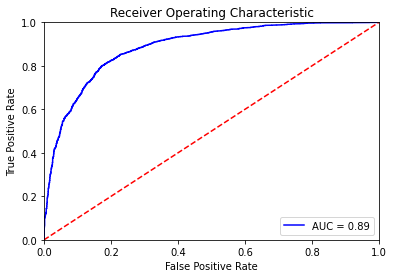

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print(confusion_matrix(test['label'], predictions))

[[1966  529]
 [ 416 2089]]


In [ ]:
print(classification_report(test['label'], predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2495
           1       0.80      0.83      0.82      2505

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

### With Kernel

#### Grid Search

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
ps.get_n_splits()

1

In [ ]:
svm_with_kernel = GridSearchCV(SVC(), param_grid, refit=True, verbose=5, n_jobs=-1, cv=ps)

In [ ]:
%%time
svm_with_kernel.fit(X, y)

Fitting 1 folds for each of 9 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 104.1min finished


CPU times: user 21min 11s, sys: 557 ms, total: 21min 12s
Wall time: 2h 5min 18s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
svm_with_kernel.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
with open("/content/gdrive/My Drive/svm_with_kernel_TF_idf.pkl", 'wb') as file:
    pickle.dump(svm_with_kernel, file)

In [ ]:
model = SVC(C=1, gamma=1, probability=True)

In [ ]:
%%time
model.fit(train_set, train['label'])

CPU times: user 1h 16min 10s, sys: 1.12 s, total: 1h 16min 11s
Wall time: 1h 16min 13s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred_prob = model.predict_proba(test_set)

In [ ]:
preds = pred_prob[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

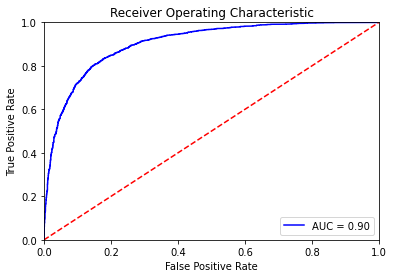

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
pred = model.predict(test_set)

In [ ]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2495
           1       0.82      0.84      0.83      2505

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [ ]:
print(confusion_matrix(test['label'],pred))

[[2026  469]
 [ 400 2105]]


In [ ]:
with open("/content/gdrive/My Drive/svm_with_kernelـTF_idfـPT.pkl", 'wb') as file:
    pickle.dump(model, file)

### Without Kernel

#### With GridSearch

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]}

In [ ]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [ ]:
ps = PredefinedSplit(test_fold)

In [ ]:
svm_without_kernel = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=5, n_jobs=-1, cv=ps)

In [ ]:
%%time
svm_without_kernel.fit(X, y)

Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s finished


CPU times: user 317 ms, sys: 101 ms, total: 418 ms
Wall time: 5.73 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
svm_without_kernel.best_params_

{'C': 0.1, 'max_iter': 10000}

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
svm = LinearSVC(C=0.1, max_iter=10000)

In [ ]:
 clf = CalibratedClassifierCV(svm)

In [ ]:
clf.fit(train_set, train['label'])

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=10000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [ ]:
pred_prob = clf.predict_proba(test_set)
preds = pred_prob[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

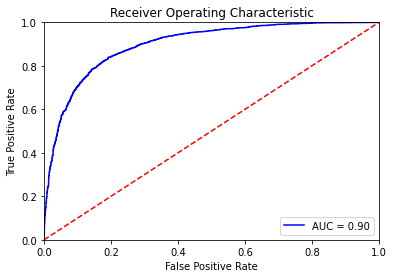

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
pred = svm_without_kernel.predict(test_set)

In [ ]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2495
           1       0.81      0.83      0.82      2505

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
print(confusion_matrix(test['label'],pred))

[[2014  481]
 [ 417 2088]]


# Bert

## Preprocessing

In [10]:
!pip install transformers

     |████████████████████████████████| 1.4MB 13.7MB/s 
     |████████████████████████████████| 2.9MB 56.5MB/s 
     |████████████████████████████████| 890kB 51.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=ce5886c52fa83e3935d09acd4288dee2c821edaddf5064fc4aea754138a7c86d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [11]:
import torch
import transformers as ppb
# import warnings
# warnings.filterwarnings('ignore')

In [12]:
# model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

### Train set Preprocessing

In [22]:
tokenized = train['text'].apply((lambda x: tokenizer.encode(x,add_special_tokens=True, truncation=True, max_length=512)))

In [23]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [24]:
np.array(padded).shape

(40000, 512)

In [25]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(40000, 512)

In [26]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [ ]:
last_hidden_states = np.zeros((40000, 768))

In [ ]:
%%time
with torch.no_grad():
  for i in range(0, 10000, 5):
  # for i in range(0, 41, 5):
    last_hidden_states[i:i+5] = model(input_ids[i:i+5], attention_mask=attention_mask[i:i+5])[0][:,0,:].numpy()

CPU times: user 2h 4min 7s, sys: 21.5 s, total: 2h 4min 28s
Wall time: 2h 4min 30s


In [ ]:
with open('/content/gdrive/My Drive/Data/last_hidden_states1.npy', 'wb') as f:
    np.save(f, last_hidden_states)

In [ ]:
%%time
with torch.no_grad():
  for i in range(10000, 20000, 5):
  # for i in range(0, 41, 5):
    last_hidden_states[i:i+5] = model(input_ids[i:i+5], attention_mask=attention_mask[i:i+5])[0][:,0,:].numpy()

with open('/content/gdrive/My Drive/Data/last_hidden_states2.npy', 'wb') as f:
    np.save(f, last_hidden_states)

CPU times: user 2h 7s, sys: 35.2 s, total: 2h 42s
Wall time: 2h 45s


In [ ]:
%%time
with torch.no_grad():
  for i in range(20000, 30000, 5):
  # for i in range(0, 41, 5):
    last_hidden_states[i:i+5] = model(input_ids[i:i+5], attention_mask=attention_mask[i:i+5])[0][:,0,:].numpy()

with open('/content/gdrive/My Drive/Data/last_hidden_states3.npy', 'wb') as f:
    np.save(f, last_hidden_states)

CPU times: user 2h 11min 58s, sys: 36 s, total: 2h 12min 34s
Wall time: 2h 12min 37s


In [27]:
%%time
with torch.no_grad():
  for i in range(30000, 40000, 5):
  # for i in range(0, 41, 5):
    last_hidden_states[i:i+5] = model(input_ids[i:i+5], attention_mask=attention_mask[i:i+5])[0][:,0,:].numpy()


CPU times: user 2h 1min 21s, sys: 25.6 s, total: 2h 1min 46s
Wall time: 2h 1min 48s


In [29]:
with open('/content/gdrive/My Drive/Data/last_hidden_states_final_False.npy', 'wb') as f:
  np.save(f, last_hidden_states, allow_pickle=False)

### Validation set Preprocessing

In [ ]:
val_tokenized = valid['text'].apply((lambda x: tokenizer.encode(x,add_special_tokens=True, truncation=True, max_length=512)))

In [ ]:
max_len = 0
for i in val_tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

val_padded = np.array([i + [0]*(max_len-len(i)) for i in val_tokenized.values])

In [ ]:
np.array(val_padded).shape

(5000, 512)

In [ ]:
val_attention_mask = np.where(val_padded != 0, 1, 0)
val_attention_mask.shape

(5000, 512)

In [ ]:
val_input_ids = torch.tensor(val_padded)  
val_attention_mask = torch.tensor(val_attention_mask)

In [ ]:
val_last_hidden_states = np.zeros((5000, 768))

In [ ]:
%%time
with torch.no_grad():
  for i in range(0, 5000, 5):
    val_last_hidden_states[i:i+5] = model(val_input_ids[i:i+5], attention_mask=val_attention_mask[i:i+5])[0][:,0,:].numpy()

CPU times: user 54min 22s, sys: 17.1 s, total: 54min 39s
Wall time: 54min 41s


In [ ]:
with open('/content/gdrive/My Drive/Data/val_last_hidden_states_final.npy', 'wb') as f:
  np.save(f, val_last_hidden_states)

In [32]:
with open('/content/gdrive/My Drive/Data/val_last_hidden_states_final.npy', 'rb') as f:
  val_last_hidden_states = np.load(f)

### Test set Preprocessing

In [ ]:
test_tokenized = test['text'].apply((lambda x: tokenizer.encode(x,add_special_tokens=True, truncation=True, max_length=512)))

In [ ]:
max_len = 0
for i in test_tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

test_padded = np.array([i + [0]*(max_len-len(i)) for i in test_tokenized.values])

In [ ]:
np.array(test_padded).shape

(5000, 512)

In [ ]:
test_attention_mask = np.where(test_padded != 0, 1, 0)
test_attention_mask.shape

(5000, 512)

In [ ]:
test_input_ids = torch.tensor(test_padded)  
test_attention_mask = torch.tensor(test_attention_mask)

In [ ]:
test_last_hidden_states = np.zeros((5000, 768))

In [ ]:
%%time
with torch.no_grad():
  for i in range(0, 5000, 5):
    test_last_hidden_states[i:i+5] = model(test_input_ids[i:i+5], attention_mask=test_attention_mask[i:i+5])[0][:,0,:].numpy()

CPU times: user 54min 35s, sys: 16.8 s, total: 54min 52s
Wall time: 54min 53s


In [ ]:
with open('/content/gdrive/My Drive/Data/test_last_hidden_states_final.npy', 'wb') as f:
  np.save(f, test_last_hidden_states)

In [33]:
with open('/content/gdrive/My Drive/Data/test_last_hidden_states_final.npy', 'rb') as f:
  test_last_hidden_states = np.load(f)

## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(last_hidden_states, train['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
predictions = gnb.predict(test_last_hidden_states)

In [50]:
pred_prob = gnb.predict_proba(test_last_hidden_states)
preds = pred_prob[:,1]

In [51]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [52]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

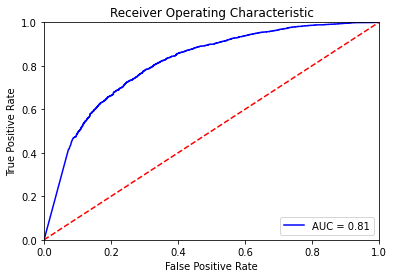

In [53]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [54]:
print(confusion_matrix(test['label'], predictions))

[[1891  604]
 [ 711 1794]]


In [55]:
print(classification_report(test['label'], predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      2495
           1       0.75      0.72      0.73      2505

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000



## Support Vector Machine

In [56]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

### Without Kernel

In [58]:
X = np.concatenate((last_hidden_states, val_last_hidden_states))

In [59]:
y = np.concatenate((train['label'], valid['label']))

In [57]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]}

In [60]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [61]:
ps = PredefinedSplit(test_fold)

In [63]:
svm_without_kernel = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=5, n_jobs=-1, cv=ps)

In [65]:
%%time
svm_without_kernel.fit(X, y)

Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   37.0s remaining:   37.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.6min finished


CPU times: user 39.7 s, sys: 385 ms, total: 40.1 s
Wall time: 15min 16s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [66]:
svm_without_kernel.best_params_

{'C': 0.1, 'max_iter': 10000}

In [67]:
from sklearn.calibration import CalibratedClassifierCV

In [68]:
svm = LinearSVC(C=0.1, max_iter=10000)

In [69]:
 clf = CalibratedClassifierCV(svm)

In [70]:
clf.fit(last_hidden_states, train['label'])

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=10000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [71]:
pred_prob = clf.predict_proba(test_last_hidden_states)
preds = pred_prob[:,1]

In [72]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

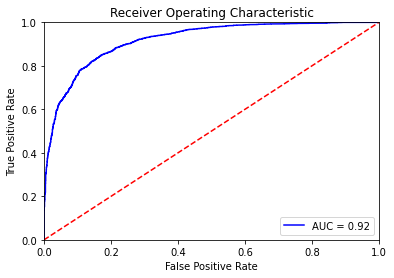

In [73]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [75]:
pred = svm_without_kernel.predict(test_last_hidden_states)

In [76]:
print(confusion_matrix(test['label'],pred))

[[2081  414]
 [ 404 2101]]


In [77]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2495
           1       0.84      0.84      0.84      2505

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



### With Kernel

In [78]:
param_grid = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']} 

In [79]:
test_fold = np.full(X.shape[0], -1)
test_fold[40001: ] = 0

In [80]:
ps = PredefinedSplit(test_fold)

In [81]:
ps.get_n_splits()

1

In [82]:
svm_with_kernel = GridSearchCV(SVC(), param_grid, refit=True, verbose=5, n_jobs=3, cv=ps)

In [83]:
%%time
svm_with_kernel.fit(X, y)

Fitting 1 folds for each of 4 candidates, totalling 4 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   4 | elapsed: 57.1min remaining: 57.1min
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed: 126.3min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed: 126.3min finished


CPU times: user 32min 56s, sys: 564 ms, total: 32min 57s
Wall time: 2h 39min 13s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [84]:
svm_with_kernel.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [85]:
pred = svm_with_kernel.predict(test_last_hidden_states)

In [86]:
print(classification_report(test['label'],pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2495
           1       0.84      0.84      0.84      2505

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [87]:
print(confusion_matrix(test['label'],pred))

[[2104  391]
 [ 391 2114]]


In [ ]:
model = SVC(C=1, gamma=0.1, probability=True)

In [ ]:
%%time
model.fit(train_las, train['label'])

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred_prob = model.predict_proba(test_las)
preds = pred_prob[:,1]

In [ ]:
fpr, tpr, threshold = roc_curve(test['label'], preds)
roc_auc = auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Word2Vec

## Preprocessing for Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
corpus = []
for text in train['text']:
  corpus.append(text.split())

In [ ]:
%%time
model = Word2Vec(sentences=corpus, size=200, window=5, min_count=20, workers=4, sample=0.001)

CPU times: user 1min 36s, sys: 381 ms, total: 1min 36s
Wall time: 52 s


In [ ]:
print(model.wv.vectors.shape)

(15630, 200)


In [ ]:
def makeFeatureVec(review, model, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
 
    word_index = set(model.wv.index2word)

    nword = 0
    
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [ ]:
def getAvgFeatureVec(clean_reviews, model, num_features):
    
    review_th = 0
    
    reviewFeatureVecs = np.zeros((len(clean_reviews), num_features), dtype = "float32")
    
    for review in clean_reviews:
        reviewFeatureVecs[int(review_th)] = makeFeatureVec(review, model, num_features)
        
        review_th += 1
    
    return reviewFeatureVecs

In [ ]:
trainDataAvg = getAvgFeatureVec(train['text'], model, 200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [ ]:
testDataAvg = getAvgFeatureVec(test['text'], model, 200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
mnb = BernoulliNB()

In [ ]:
mnb.fit(trainDataAvg, train['label'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = mnb.predict(testDataAvg)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [ ]:
print(confusion_matrix(test['label'], predictions))

[[1389 1106]
 [1108 1397]]


In [ ]:
print(classification_report(test['label'], predictions))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      2495
           1       0.56      0.56      0.56      2505

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [ ]:
model = SVC(C=1, gamma=0.01)

In [ ]:
%%time
model.fit(trainDataAvg, train['label'])

CPU times: user 11min 31s, sys: 387 ms, total: 11min 31s
Wall time: 11min 32s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predeictios = model.predict(testDataAvg)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

In [ ]:
print(classification_report(test['label'], predeictios))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      2495
           1       0.58      0.59      0.59      2505

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000



In [ ]:
print(confusion_matrix(test['label'], predeictios))

[[1429 1066]
 [1017 1488]]


# Temp

## Save Processed Data Frame

In [ ]:
train.to_csv("Train_processed.csv")

In [ ]:
valid.to_csv("Valid_processed.csv")

In [ ]:
test.to_csv("Test_processed.csv")